# Busines Case:- To predict the flight ticket prices based on given data

### 1) IMPORT LIBRARIES

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import re
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

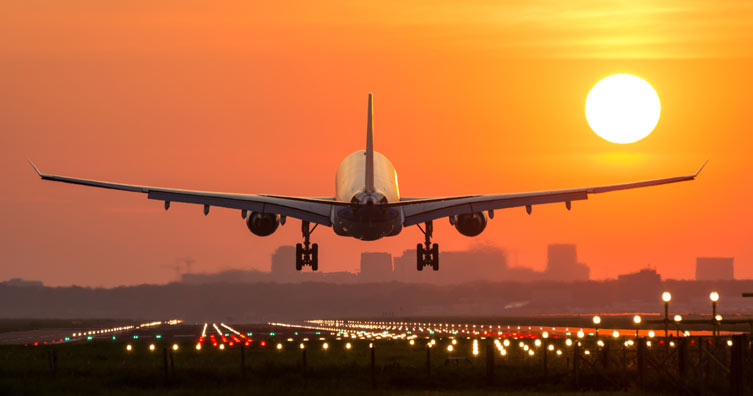

In [4]:
from IPython.display import Image
Image("flights.jpg")

### 2) Load Data

In [5]:
## import data
data=pd.read_excel("Flight_Fare.xlsx")

In [6]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


### Domain Knowledge

1.Airline: This column represents the name of the airline company operating the flight.
2.Date_of_Journey: This column indicates the date when the journey is scheduled to begin.
3.Source: The starting location or city from which the flight originates.
4.Destination: The final destination or city where the flight is scheduled to arrive.
5.Route: The sequence of connecting cities or airports that the flight will pass through from so rce
to destination.
6.Dep_Time: The departure time of the flight from the source airport.
7.Arrival_Time: The expected arrival time of the flight at the destination airport.
8.Duration: The duration of the flight, indicating the time taken to travel from source to destination.
9.Total_Stops: The number of stops or layovers during the journey. It can be a direct  light or
have one or more layovers.
10.Additional_Info: Any additional information or notes about the flight that might not be covered
by other columns. This c uld include special services, amenities, or instructions.
11.Price: The fare or price of the flight ticket. This is the target variable for predi tion in your
analysis.s based on given data

In [7]:
# to see the first five data
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
# to see the bottom five data
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
data.shape

(10683, 11)

In [11]:
data.size

117513

In [14]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [16]:
# to see the statistical parameters of categorical columns
data.describe(include=["O"])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [17]:
# to see the statistical parameters of numerical columns
data.describe(include=["int64"])

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [21]:
data.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

## 3) EDA

### 3.1) UNIVARIATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

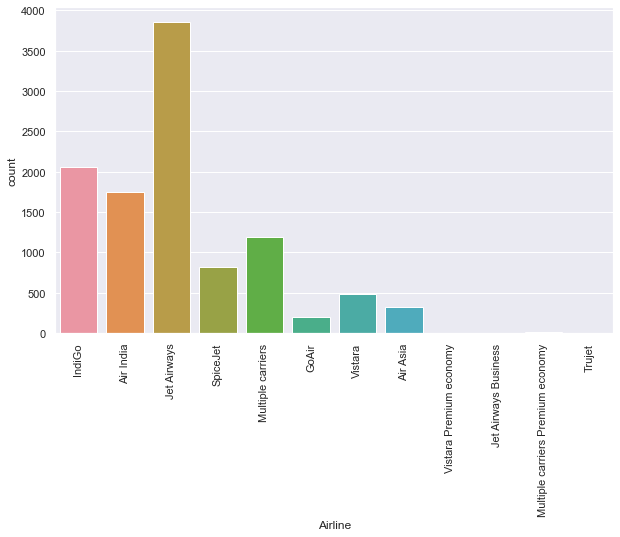

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x="Airline",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

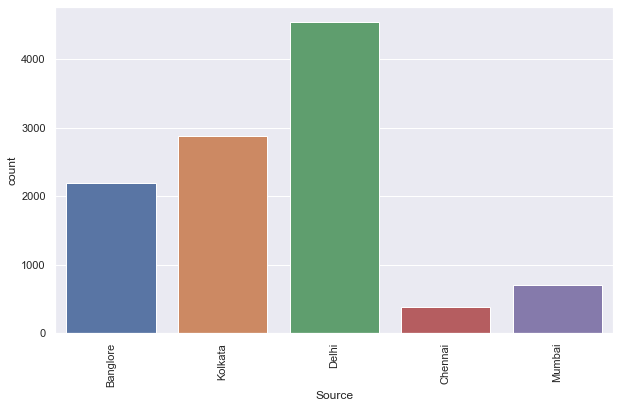

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x="Source",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

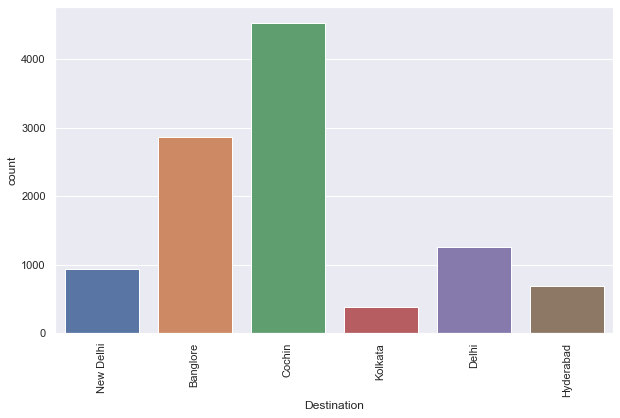

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x="Destination",data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'non-stop'),
  Text(1, 0, '2 stops'),
  Text(2, 0, '1 stop'),
  Text(3, 0, '3 stops'),
  Text(4, 0, '4 stops')])

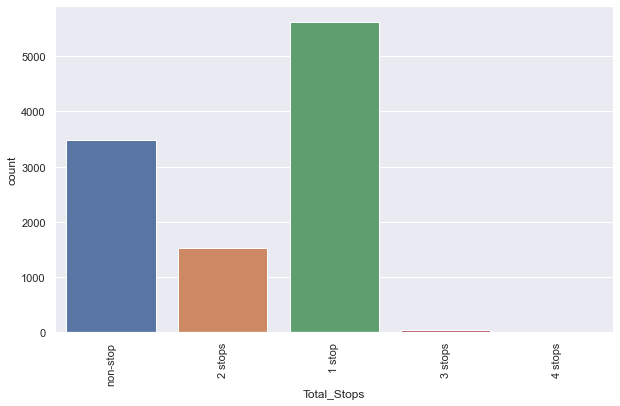

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x="Total_Stops",data=data)
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

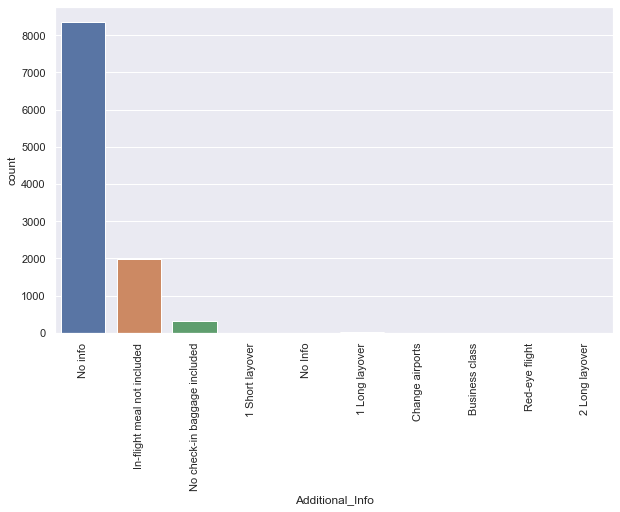

In [26]:
plt.figure(figsize=(10,6))
sns.countplot(x="Additional_Info",data=data)
plt.xticks(rotation=90)

In [28]:
# sweetviz is used for univariate
!pip install sweetviz

   ---------------------------------------- 15.1/15.1 MB 717.8 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: C:\Users\Lenovo\anaconda3\python.exe -m pip install --upgrade pip


In [29]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html("my_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 3.2) BYVARIATE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

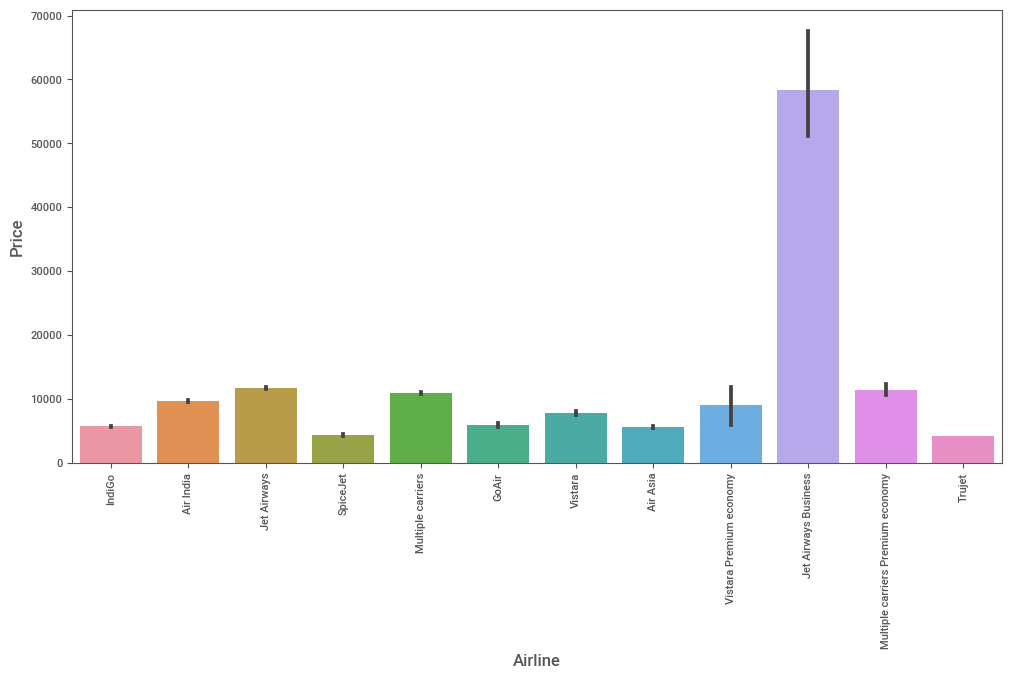

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=data)
plt.xticks(rotation=90)

## Data Preprocessing

In [31]:
# check the null value present in the data
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [32]:
# We drop the null value
data.dropna(inplace=True)

In [33]:
data.shape

(10682, 11)

In [35]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Date

In [37]:
data["journey_Date"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.day

### Month

In [38]:
data["journey_Month"]= pd.to_datetime(data['Date_of_Journey'], format= "%d/%m/%Y").dt.month


In [39]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [40]:
# droping date of journey column as we have allready extracted data and month
data.drop(['Date_of_Journey'],axis=1,inplace=True)

### Hour

In [41]:
# Extracting Hours
data['Dep_hour']=pd.to_datetime(data['Dep_Time']).dt.hour #pd.to_datetime

### Minutes

In [42]:
#Extracting minutes
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute

In [43]:
#Now we will drop the dep_time as we dont need it anymore
data.drop(['Dep_Time'],axis=1,inplace=True)

In [44]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [46]:
# Extracting Hours
data['Arrival_hour']=pd.to_datetime(data['Arrival_Time']).dt.hour #pd.to_datetime
#Extracting minutes
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute
#Now we will drop the dep_time, no use
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [47]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [53]:
# Assigning and converting Duration column into list to extract hours and␣ minutes seperately
duration = list(data["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # Adds 0 hour
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours␣ from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))


In [54]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins
#we will remove the Durtaion column
data.drop(['Duration'],axis=1,inplace=True)


In [55]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Converting categorical column to numerical using onehotcoder

In [56]:
cat_col=data.select_dtypes(include=["O"])
cat_col.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


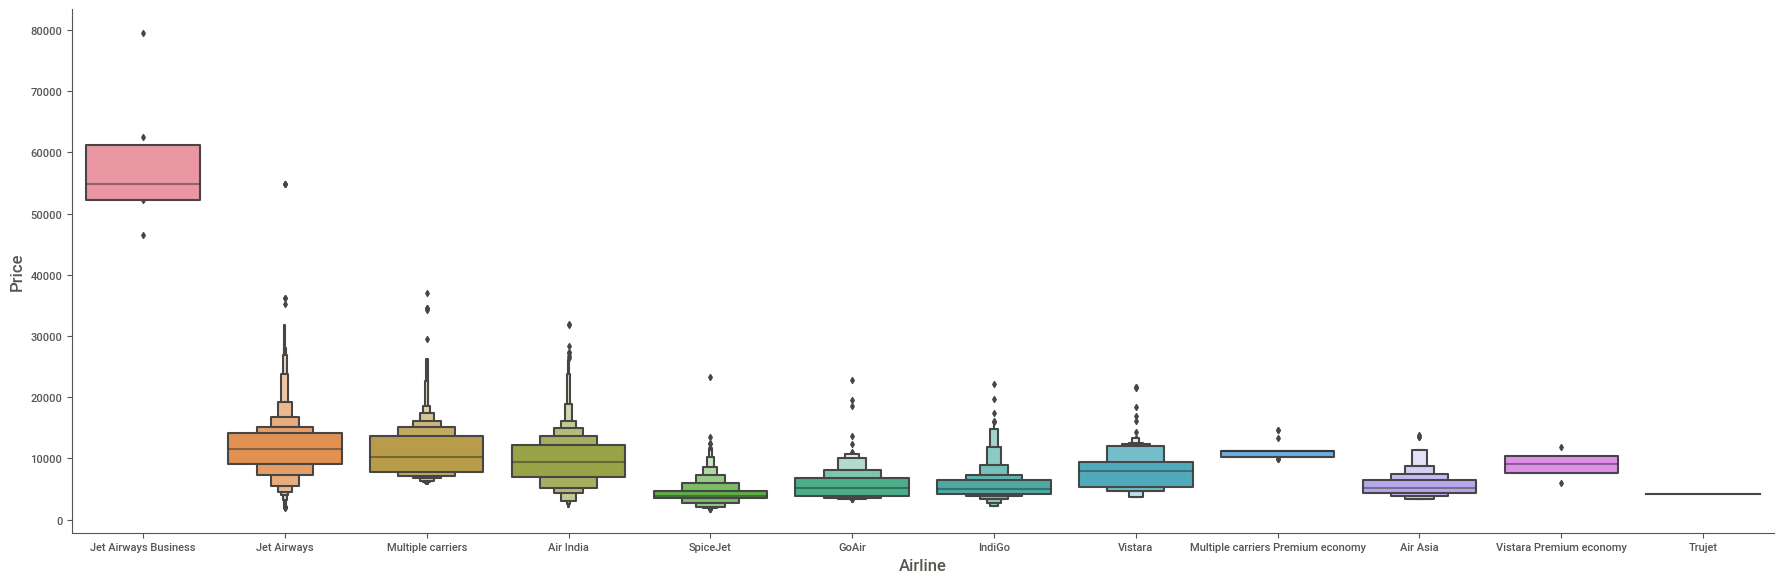

In [58]:
# Airline vs Price
sns.catplot(x="Airline",y="Price",data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [66]:
data2=data.copy()

In [67]:
#OneHotEncoding
df1=pd.get_dummies(data2["Airline"],drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop(["Airline"],axis=1)

In [68]:
data2.head()

,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,...,0,1,0,0,0,0,0,0,0,0


In [69]:
#OneHotEncoding
df2=pd.get_dummies(data2["Source"],drop_first=True)
data2=pd.concat([data2,df2],axis=1).drop(["Source"],axis=1)

In [70]:
data2.head()

,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,...,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,0


In [71]:
 #OneHotEncoding
df3=pd.get_dummies(data2["Destination"],drop_first=True)
data2=pd.concat([data2,df3],axis=1).drop(["Destination"],axis=1)

In [72]:
data2.head()

,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


In [73]:
# droping column, because Additinal_info since 80 % has no information
# Route---> is related to no of stops
data2.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [74]:
data2.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,non-stop,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2 stops,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1 stop,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1 stop,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

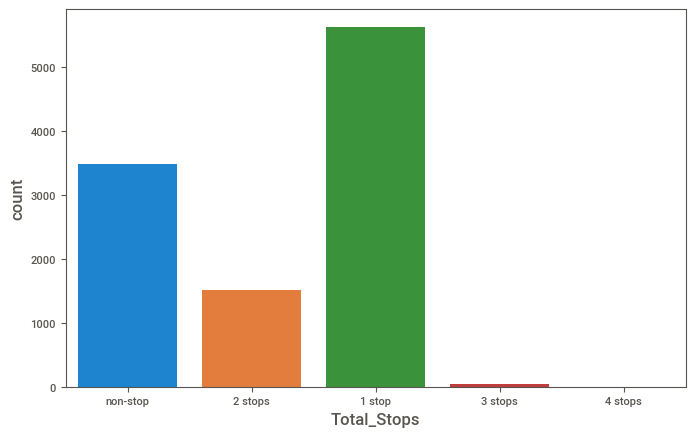

In [75]:
plt.figure(figsize=(8,5))
sns.countplot(data=data,x="Total_Stops")

In [76]:
data2['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [77]:
# Based on the observation from above countplot and value counts we can manualy␣ encode the total_stop column
data2.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df=data2
df.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [78]:
x=df.drop("Price",axis=1)
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


### Scaling

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
print(x)

[[0.         0.88461538 0.         ... 0.         0.         1.        ]
 [0.5        0.         0.66666667 ... 0.         0.         0.        ]
 [0.5        0.30769231 1.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.33333333 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.5        0.30769231 0.66666667 ... 0.         0.         0.        ]]


### Feature Engineering

In [80]:
data2=df.iloc[0:10,0:10]
data2

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45
5,0,3873,24,6,9,0,11,25,2,25
6,1,11087,12,3,18,55,10,25,15,30
7,1,22270,1,3,8,0,5,5,21,5
8,1,11087,12,3,8,55,10,25,25,30
9,1,8625,27,5,11,25,19,15,7,50


In [81]:
data.corr

<bound method DataFrame.corr of            Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

      Additional_In

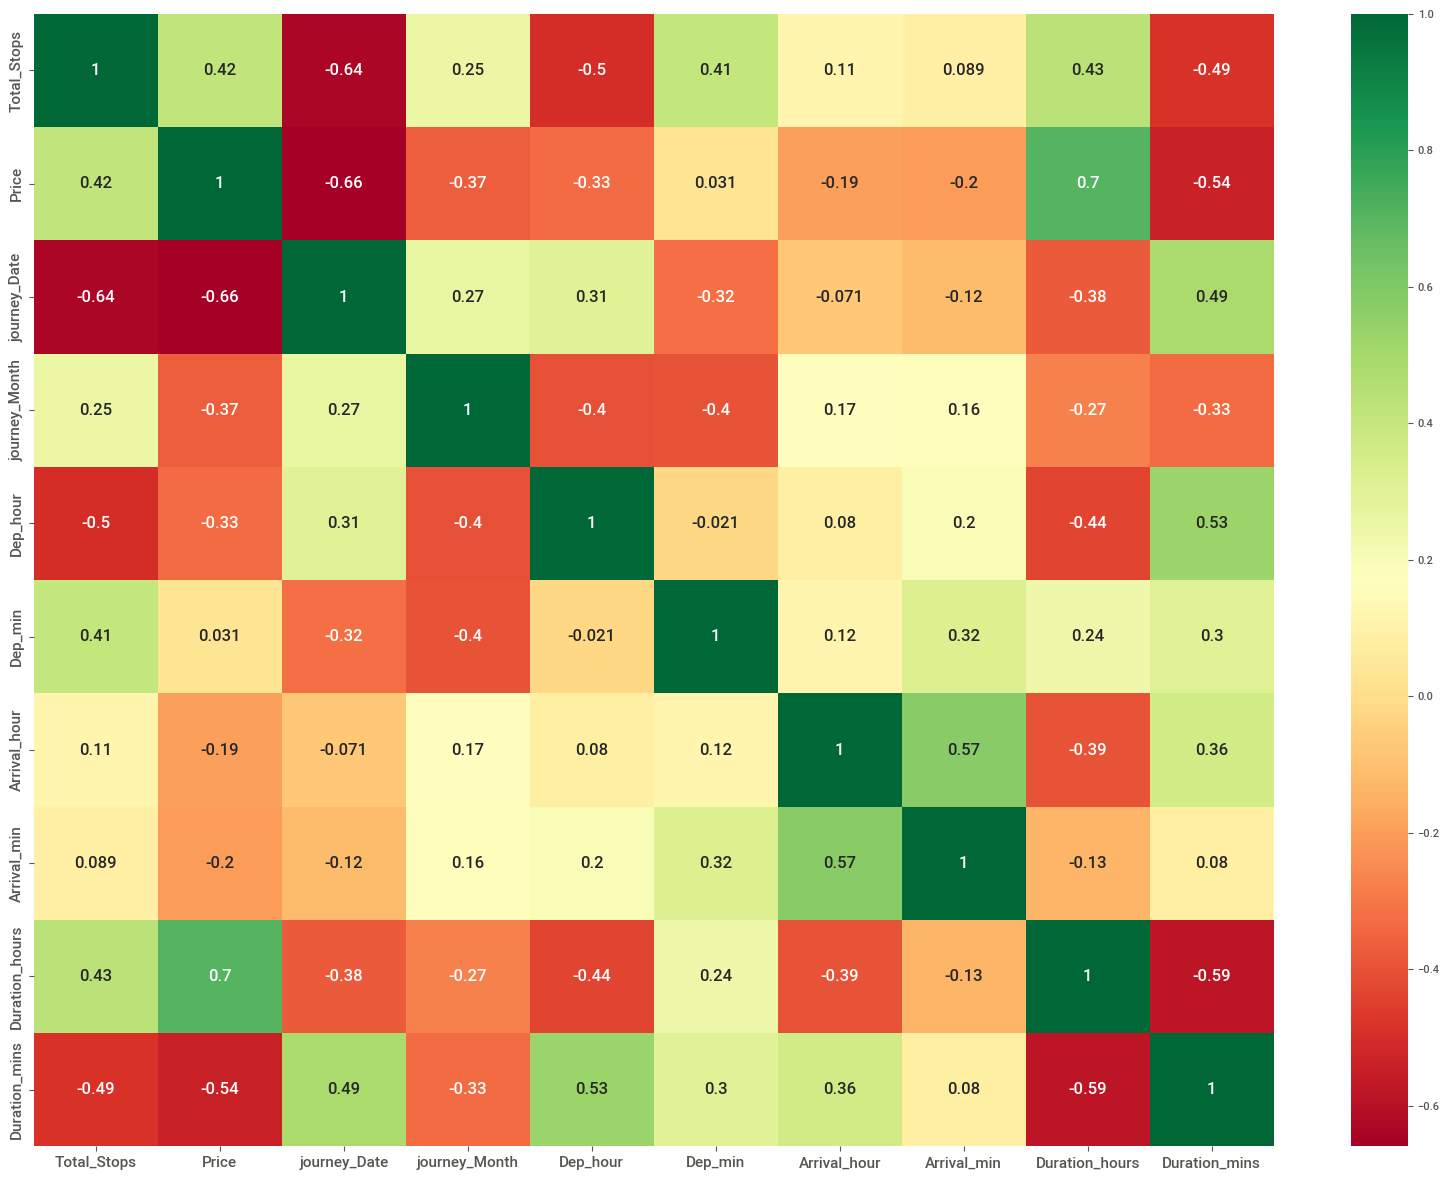

In [84]:
# Heatmap- to find the correlation between independent to independent and␣ independent to dependent variables
plt.figure(figsize=(20,15))
sns.heatmap(data2.corr(),annot = True, cmap = "RdYlGn")
plt.tick_params(labelsize=11)

### Model Creation

In [85]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [88]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [89]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8011, 29)
(8011,)
(2671, 29)
(2671,)


### Linear Regression

In [90]:
## importing the model library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [92]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)


7835152.9499018295
1949.4583561151017


In [93]:
import math
rmse=math.sqrt(mae)
print(rmse)


44.15267099638596


In [94]:
lr_score=r2_score(y_test,y_pred)
lr_score

0.6198931301596479

### KNN

In [95]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [98]:
from sklearn.model_selection import train_test_split## splitting the training␣ and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [99]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=5)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [100]:
(y_test!=y_pred).sum()

2639

In [101]:
len(y_test)

2671

In [102]:
(y_test!=y_pred).sum()/len(y_test)

0.9880194683639086

In [104]:
## taking optimal k to determine how many nearest neighbors to create
# create a list to store the error values for each k
ERROR_RATE=[]
for i in range(1,13):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    error_rate=(y_test!=y_pred).sum()/len(y_test)
    ERROR_RATE.append(error_rate)

In [105]:
ERROR_RATE

[0.7865967802321228,
 0.9183826282291276,
 0.9591913141145638,
 0.9790340696368401,
 0.9880194683639086,
 0.9962560838637214,
 0.9970048670909771,
 0.9992512167727443,
 0.9996256083863722,
 1.0,
 1.0,
 0.9996256083863722]

Text(0, 0.5, 'Error Rate')

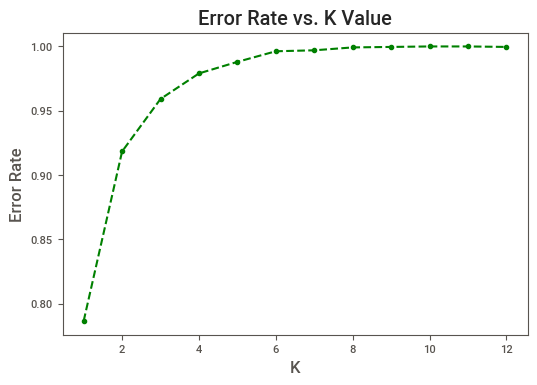

In [106]:
 # Lets plot the k-value and error rate
plt.plot(range(1,13),ERROR_RATE,color='green',marker='o',linestyle='--')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [107]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [108]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [109]:
mse=mean_squared_error(y_test,y_pred)
mse

8908715.681299139

In [110]:
mae=mean_absolute_error(y_test,y_pred)
mae

1845.3384500187196

In [111]:
knn_score=r2_score(y_test,y_pred)
knn_score

0.5678113683844929

In [112]:
adj_r2=1-(1-knn_score)*(2671-1)/(2671-13-1)
adj_r2

0.5656967834349251

### Decision Tree

In [113]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [114]:
from sklearn.model_selection import train_test_split# preparing training and␣testing data
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.25,random_state=42)

In [115]:
from sklearn.tree import DecisionTreeRegressor#importing decision tree from␣ sklearn.tree
dt=DecisionTreeRegressor()#object creation for decision tree
dt.fit(x_train,y_train)#training the model
y_pred=dt.predict(x_test)#prediction

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [117]:
mse=mean_squared_error(y_test,y_pred)
mse

5843833.746869046

In [118]:
mae=mean_absolute_error(y_test,y_pred)
mae

1346.0685760638962

In [119]:
dt_score=r2_score(y_test,y_pred)
dt_score

0.7164980227453452

In [120]:
adj_r2=1-(1-dt_score)*(2671-1)/(2671-13-1)
adj_r2

0.7151109223673586

### Randon Forest

In [121]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [122]:
# Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [123]:
x.shape

(10682, 29)

In [124]:
y.shape

(10682,)

In [125]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor()
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [126]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [128]:
#Mean absolute error
MAE=mean_absolute_error(y_test,y_pred)
MAE

1161.036672211384

In [129]:
#Mean Squared error
MSE=mean_squared_error(y_test,y_pred)
MSE

4117089.746741665

In [130]:
#Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

2029.061296940451

In [131]:
r2=r2_score(y_test,y_pred)
r2

0.8002675753119293

In [132]:
adj_r2=1-(1-r2)*(2671-1)/(2671-13-1)
adj_r2

0.7992903372536135

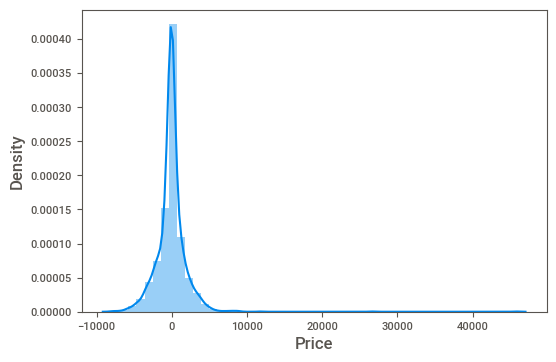

In [133]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-y_pred)
plt.show()

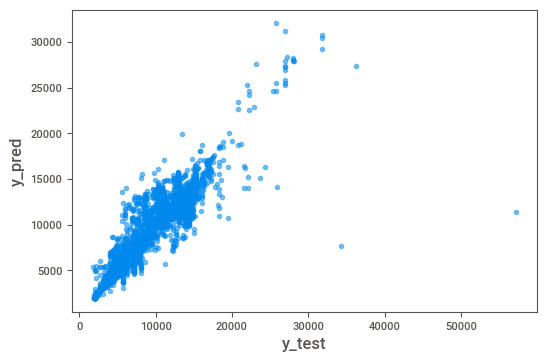

<Figure size 600x400 with 0 Axes>

In [135]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

### Hyper ParameterTuning

In [136]:
from sklearn.model_selection import RandomizedSearchCV

In [137]:
n_estimators=[int(x)for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split=[2,3,10,15,100]
min_samples_leaf=[1,2,5,10]


In [138]:
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf}


In [142]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,scoring='neg_mean_squared_error',
verbose=2)

In [143]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=  10.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   9.5s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [144]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [145]:
from sklearn.ensemble import RandomForestRegressor
random_forest=RandomForestRegressor(n_estimators= 500,
min_samples_split= 10,
min_samples_leaf= 1,
max_features= 'auto',
max_depth= 20)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)

In [146]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [147]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1130.6524935152047

In [148]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3814816.9516349444

In [149]:
#Root mean squared error
RMSE=np.sqrt(MSE)
RMSE

1953.1556393782203

In [150]:
random_forest.score(x_train,y_train)

0.9106730746167967

In [151]:
random_forest.score(x_test,y_test)

0.8149317390775325

In [190]:
from sklearn import metrics

In [191]:
# R2 score
rf_score=metrics.r2_score(y_test,y_pred)
rf_score

0.8149317390775325

In [153]:
prediction=rf_random.predict(x_test)

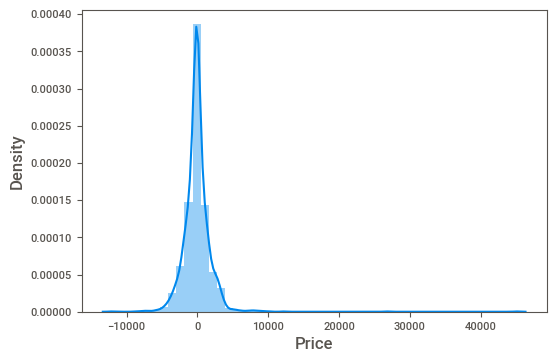

In [154]:
plt.figure(figsize=(6,4))
sns.distplot(y_test-prediction)
plt.show()

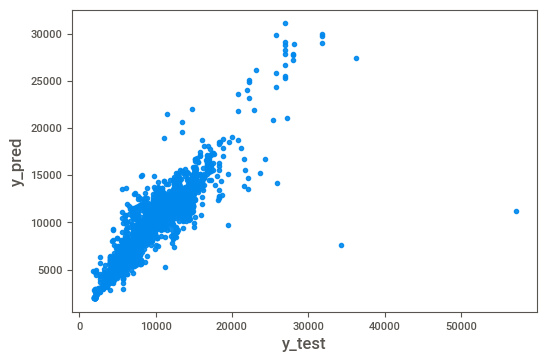

<Figure size 600x400 with 0 Axes>

In [155]:
plt.scatter(y_test, y_pred, alpha = 0.9)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.figure(figsize=(6,4))
plt.show()

### Gradient Boosting

In [156]:
# for the model creation we have to separate the independent and dependent
x=df.drop("Price",axis=1)
y=df["Price"]

In [157]:
# Splitting the Data into Train & Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [158]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(n_estimators=100) ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_hat=gbm.predict(x_test)#predicting the price

In [159]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [160]:
mse=mean_squared_error(y_test,y_hat)
mse

4303433.9738366585

In [161]:
mae=mean_absolute_error(y_test,y_hat)
mae

1487.7600079438214

In [162]:
gb_score=r2_score(y_test,y_hat)
gb_score

0.7912274555686657

In [163]:
adj_r2=1-(1-gb_score)*(2671-1)/(2671-13-1)
adj_r2

0.7902059865895135

### Hyper ParameterTuning

In [164]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
'n_estimators': [100, 200, 300],
'learning_rate': [0.01, 0.1, 0.2],
'max_depth': [3, 4, 5],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'subsample': [0.8, 0.9, 1.0]
}

In [166]:
rsc=RandomizedSearchCV(estimator=gbm,param_distributions=param_grid,scoring='neg_mean_squared_error',
verbose=2)

In [167]:
rsc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.9; total time=   2.6s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.9; total time=   3.0s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.9; total time=   2.5s
[CV] END learning_rate=0.2, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=0.9; total time=   2.4s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   3.1s
[CV] END learning_rate=0.2, max_depth=4, min_samples_leaf=1, min_samples_split=5, n_estimators=300, subsample=0.8; total time=   3.3s
[

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='neg_mean_squared_error', verbose=2)

In [168]:
rsc.best_params_

{'subsample': 0.8,
 'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 4,
 'learning_rate': 0.2}

In [169]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost=GradientBoostingRegressor(n_estimators= 300,
min_samples_split= 10,
min_samples_leaf= 2,
subsample= 0.9,
learning_rate= 0.1,
max_depth= 5)
gradient_boost.fit(x_train,y_train)
y_hat=gradient_boost.predict(x_test)

In [170]:
## evaluatin the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [171]:
mse=mean_squared_error(y_test,y_hat)
mse

3065028.2961340034

In [172]:
mae=mean_absolute_error(y_test,y_hat)
mae

1160.0197435115488

In [173]:
gbst_score=r2_score(y_test,y_hat)
gbst_score

0.8513062451920353

### Result

In [178]:
scores = [lr_score,knn_score,dt_score,r2,gbst_score]
algorithms = ["Linear Regression","KNN","Decision Tree","Random Forest","Gradient Boosting"]
for i in range(len(algorithms)):
    print("The R2 score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The R2 score achieved using Linear Regression is: 0.6198931301596479%
The R2 score achieved using KNN is: 0.5678113683844929%
The R2 score achieved using Decision Tree is: 0.7164980227453452%
The R2 score achieved using Random Forest is: 0.8002675753119293%
The R2 score achieved using Gradient Boosting is: 0.8513062451920353%


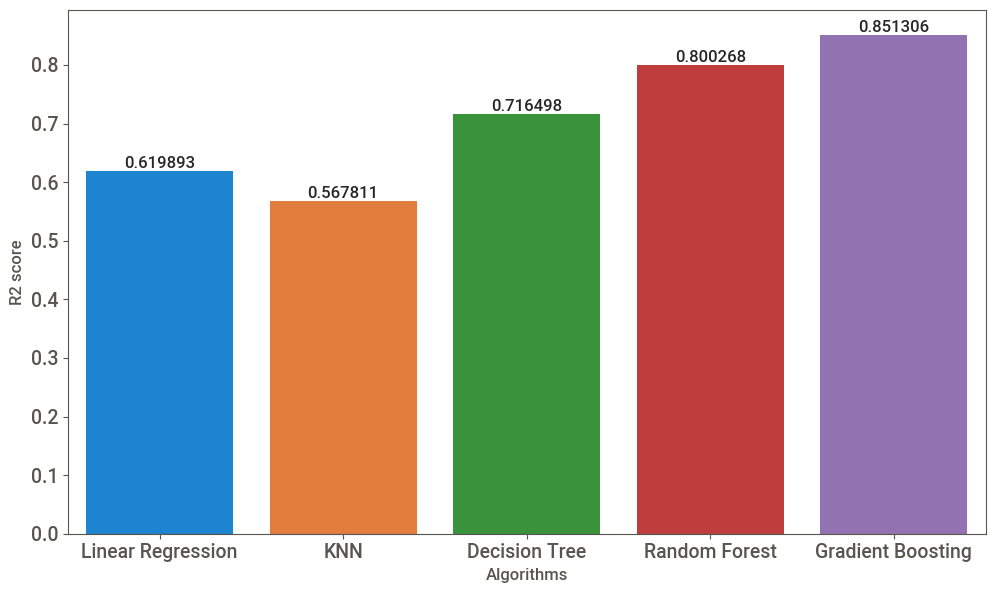

In [181]:
plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("R2 score")
ax=sns.barplot(x=algorithms,y=scores)
for label in ax.containers:
    ax.bar_label(label)
plt.tight_layout()
plt.tick_params(labelsize=14)

In [183]:
import pickle
# open a file, where you ant to store the data
file = open('flight_price_rf_new.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest, file)

In [184]:
model = open('flight_price_rf_new.pkl','rb')
forest = pickle.load(model)

In [186]:
y_prediction = forest.predict(x_test)

In [188]:
from sklearn import metrics

In [189]:
metrics.r2_score(y_test, y_prediction)

0.8149317390775325

In [200]:
import pickle
# open a file, where you ant to store the data
file = open('flight_price_gb_new.pkl', 'wb')

# dump information to that file
pickle.dump(rsc, file)

In [201]:
model2 = open('flight_price_gb_new.pkl','rb')
gradient = pickle.load(model2)

In [202]:
y_pred2 = gradient.predict(x_test)
metrics.r2_score(y_test, y_pred2)

0.8342869690083747